# Product Torus With Varying Fiber Radius

An example of how the `circle_bundles` pipeline can capture topological structure which is not detected with a direct persistence computation.  

We sample from a product torus in $\mathbb{C}^{2}$ where the fiber radius continuously varies from small to large.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ripser import ripser
from persim import plot_diagrams

import circle_bundles as cb

First, generate a noisy sampling:

In [2]:
r_min, r_max = 0.25, 1.5   #min and max fiber radius
r_func = cb.small_to_big(r_min, r_max)

rng = np.random.default_rng(0)

n_samples = 5000
data, base_points, true_fiber_angles = cb.sample_C2_torus(
    n_samples,
    r_func=r_func,
    sigma=0.15,              
    rng=rng,
    return_alpha=True,
)

Optionally run the cell below to see an interactive visualization of the dataset and projection map:

In [ ]:
app = cb.show_bundle_vis(base_points = base_points, data = data)

Compute a persistence diagram from a sample of the data:

In [ ]:
diagrams = ripser(data, maxdim = 2, n_perm = 500)['dgms']
plot_diagrams(diagrams)

Observe that the persistence diagram shows only a single persistence class in dimension 1 (we would expect two for a torus).  This is a result of the large variation in the fiber radius of the underlying model. 

Instead, use a fiberwise approach to detect the global topology. Construct a cover of the base space $\mathbb{S}^{1}$ by open balls $\mathcal{U} = \{U_{j}\}_{j=1}^{30}$ around equally-spaced landmarks:

In [3]:
n_landmarks = 30
lmk_angs = np.linspace(0, 2*np.pi, n_landmarks, endpoint= False)
landmarks = np.array([np.cos(lmk_angs), np.sin(lmk_angs)]).T
overlap = 1.99
radius = overlap* np.pi/n_landmarks

cover = cb.get_metric_ball_cover(base_points, 
                                 landmarks, 
                                 radius = radius, 
                                 metric = cb.S1UnitVectorMetric())



Compute a persistence diagram for the data in each set $\pi^{-1}(U_{j})$:

In [ ]:
fiber_ids, dense_idx_list, rips_list = cb.get_local_rips(
    data,
    cover.U,
    to_view = [0,3,8], #Choose a few diagrams to compute 
                       #(or compute all by setting to None)
    maxdim=1,
    n_perm=500,
    random_state=None,
)

fig, axes = cb.plot_local_rips(
    fiber_ids,
    rips_list,
    n_cols=3,
    titles='default',
    font_size=20,
)

Observe that each $\pi^{-1}(U_{j})$ has a single 1-dimensional (circular) persistent feature, though the scales are significantly different. This supports the hypothesis that the data has the structure of a discrete approximate circle bundle over $\mathbb{S}^{1}$. Up to isomorphism, the only circle bundles over $\mathbb{S}^{1}$ are the torus (trivial) and the Klein bottle (non-orientable). These two possibilities are distinguished by the orientation class $w_{1}$ (the Euler class is trivial for any circle bundle over $\mathbb{S}^{1}$).

Construct a bundle object. Compute local trivializations and approximate transition matrices:

In [4]:
bundle = cb.Bundle(X = data, cover = cover)
local_triv_result = bundle.get_local_trivs(show_summary = True)

<IPython.core.display.Math object>

Now, compute characteristic class information:

In [5]:
class_result = bundle.get_classes(show_classes = True)

<IPython.core.display.Math object>

The characteristic classes indicate that the global structure is trivial (as expected), so a global coordinate system is possible. Synchronize local circular coordinates and compute a global toroidal coordinate system:

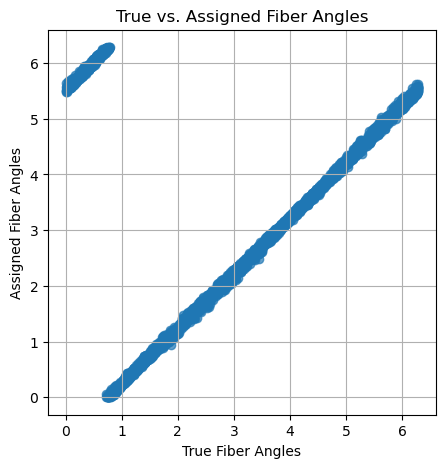

In [6]:
fiber_angles = bundle.get_global_trivialization()

#Show the correlation between true and assigned fiber coordinates
plt.figure(figsize=(5,5))
plt.scatter(true_fiber_angles, fiber_angles, alpha=0.7)
plt.xlabel("True Fiber Angles")
plt.ylabel("Assigned Fiber Angles")
plt.title("True vs. Assigned Fiber Angles")
plt.grid(True)
plt.show()

Note that the correlation is nearly perfect -- the true and assigned fiber coordinates roughly differ by a global shift of about $0.5$ radians.  

Optionally run the cell below to view an interactive visualization of the dataset colored according to assigned fiber coordinate:

In [ ]:
app = cb.show_bundle_vis(base_points = base_points, data = data, colors = fiber_angles)

### Cover And Nerve Summary
- $n_\text{sets} = 30$, $n_\text{samples} = 5000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 30$
- $\#(\text{1-simplices}) = 30$
- *No recorded simplices in dimensions* $\ge 2$

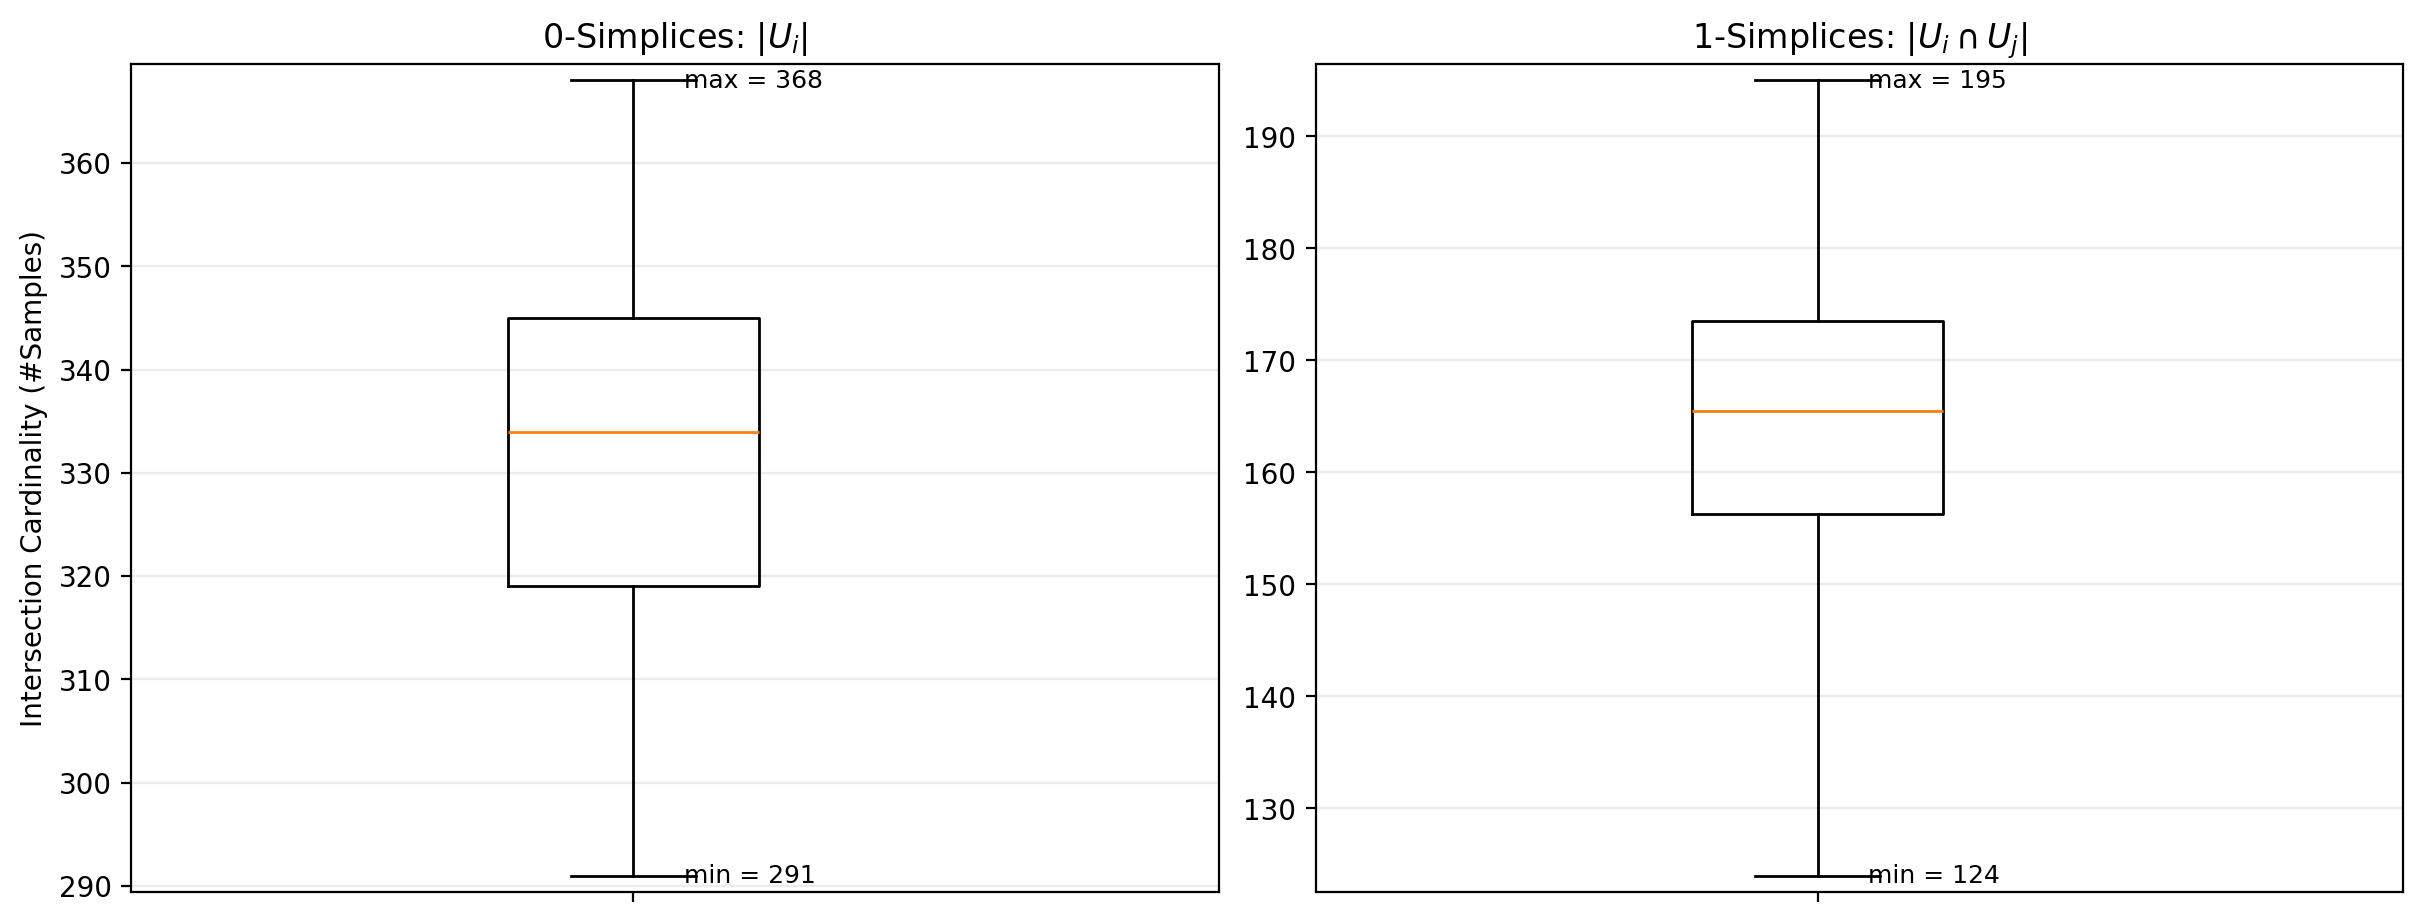

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
summ = bundle.summary()